# Day 10: Pipe Maze

In [64]:
import numpy as np


test_data1_raw = (
""".....
.S-7.
.|.|.
.L-J.
.....
"""
)


def parse_data(raw_data):
    return np.array([list(line) for line in raw_data.splitlines()])

test_data1 = parse_data(test_data1_raw)
test_data1

array([['.', '.', '.', '.', '.'],
       ['.', 'S', '-', '7', '.'],
       ['.', '|', '.', '|', '.'],
       ['.', 'L', '-', 'J', '.'],
       ['.', '.', '.', '.', '.']], dtype='<U1')

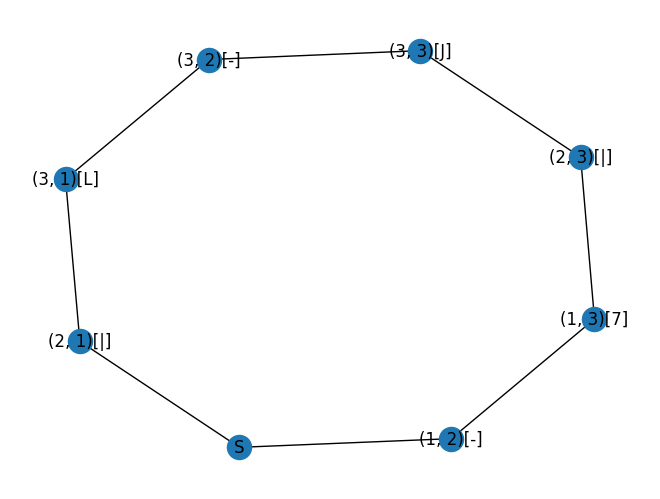

In [66]:
import networkx as nx


def arr_to_graph(arr):
    DIRECTIONS = {
        "|": [(-1, 0), (1, 0)],
        "-": [(0, -1), (0, 1)],
        "L": [(-1, 0), (0, 1)],
        "J": [(-1, 0), (0, -1)],
        "7": [(1, 0), (0, -1)],
        "F": [(1, 0), (0, 1)],
    }

    def get_node_label(x, y):
        return f"({x}, {y})[{arr[x, y]}]" if arr[x, y] != "S" else "S"
    
    def is_valid_neighbour(x, y, x_dir, y_dir):
        return (
            0 <= x + x_dir < arr.shape[0] and 0 <= y + y_dir < arr.shape[1]
            and (
                arr[x + x_dir, y + y_dir] == "S" 
                or (
                    arr[x + x_dir, y + y_dir] in DIRECTIONS.keys()
                    and (x_dir * -1, y_dir * -1) in DIRECTIONS[arr[x + x_dir, y + y_dir]]
                )
            )
        )

    graph = nx.Graph()

    for x, y in np.ndindex(arr.shape):
        element = arr[x, y]
        if element in DIRECTIONS.keys():
            x_dir1, y_dir1 = DIRECTIONS[element][0]
            x_dir2, y_dir2 = DIRECTIONS[element][1]

            if is_valid_neighbour(x, y, x_dir1, y_dir1) and is_valid_neighbour(x, y, x_dir2, y_dir2):
                graph.add_edge(get_node_label(x, y), get_node_label(x + x_dir1, y + y_dir1))
                graph.add_edge(get_node_label(x, y), get_node_label(x + x_dir2, y + y_dir2))

    return graph


nx.draw(arr_to_graph(test_data1), with_labels=True)

In [67]:
def part1(data):
    graph = arr_to_graph(data)
    paths = nx.shortest_path_length(graph, "S")
    return max(paths.values())


part1(test_data1)

4

In [68]:
with open("input.txt") as f:
    data = parse_data(f.read())

In [69]:
part1(data)

6951